Pleural Effusion Classifier

In [1]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [2]:
train_path = r'dataset\training_set'
val_path = r'dataset\validation_set'
adam = Adam(
    lr=0.0001
    , beta_1=0.9
    , beta_2=0.999
    , epsilon=1e-8
    #, decay=1e-1
    )
image_size = [224, 224]
batch_size = 16
epochs = 100
#reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 3, verbose = 1, min_delta =0.0001)
checkpoint = ModelCheckpoint(r'checkpoint\vgg19gap_checkpoint.h5', monitor = 'val_loss', mode = 'min', save_best_only = True, verbose = 1)
callbacks = [checkpoint]

The Model

In [3]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg19 = VGG19(include_top=False, weights='imagenet', input_shape=image_size + [3])
transmod = vgg19

In [4]:
for layer in transmod.layers:
    layer.trainable = False
transmod.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
x = transmod.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation= 'relu')(x)
x = Dense(1024, activation= 'relu')(x)
prediction = Dense(2, activation = 'softmax')(x)

model = Model(inputs=transmod.input, outputs=prediction)

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [7]:
for layer in model.layers:
    print("{}: {}".format(layer, layer.trainable))

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x000002357F5C27C8>: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002357F357F08>: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000023575F6CBC8>: False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000002357F5CA648>: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002357F5CAF88>: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002357F5C4AC8>: False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000002357F5D0C08>: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002357F5B2A88>: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002357F5F3C48>: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002350032D808>: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000023500331D88>: False
<tensorf

In [8]:
for layer in model.layers[17:]:
    layer.trainable = True

In [9]:
for layer in model.layers:
    print("{}: {}".format(layer, layer.trainable))

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x000002357F5C27C8>: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002357F357F08>: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000023575F6CBC8>: False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000002357F5CA648>: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002357F5CAF88>: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002357F5C4AC8>: False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000002357F5D0C08>: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002357F5B2A88>: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002357F5F3C48>: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002350032D808>: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000023500331D88>: False
<tensorf

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
# train_datagen = ImageDataGenerator()
# training_set = train_datagen.flow_from_directory(
#     train_path
#     ,target_size=image_size
#     ,color_mode = 'rgb'
#     ,batch_size=2000
#     ,class_mode='categorical'
#     )

# data, _ = training_set.next()

In [12]:
train_datagen = ImageDataGenerator(
        rescale = 1./255
        ,width_shift_range = 0.1
        ,height_shift_range = 0.1
        #,featurewise_center =  True
        #,featurewise_std_normalization = True
        )

# train_datagen.fit(data)

validation_datagen = ImageDataGenerator(rescale = 1./255)

# validation_datagen.fit(data)

training_set = train_datagen.flow_from_directory(
        train_path
        ,class_mode = 'categorical'
        ,target_size = image_size
        ,color_mode = 'rgb'
        ,shuffle = True
        ,batch_size = batch_size
        )

validation_set = validation_datagen.flow_from_directory(
        val_path
        ,class_mode = 'categorical'
        ,target_size = image_size
        ,color_mode = 'rgb'
        ,shuffle = False
        ,batch_size = batch_size
        )

Found 2000 images belonging to 2 classes.
Found 250 images belonging to 2 classes.


In [13]:
model.compile(
    optimizer = adam
    ,loss = 'categorical_crossentropy'
    ,metrics = ['accuracy']
    )

In [23]:
# training & validation results shown below is after rerun
history = model.fit_generator(
    training_set
    ,epochs = epochs
    ,validation_data = validation_set
    ,callbacks = callbacks
    )

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 125 steps, validate for 16 steps
Epoch 1/100
124/125 [============================>.] - ETA: 0s - loss: 0.3878 - accuracy: 0.8327
Epoch 00001: val_loss improved from inf to 0.43639, saving model to C:\Users\ahmad\Documents\Python Scripts\project_5\test_3\checkpoint\vgg19gap_checkpoint.h5
125/125 [==============================] - 82s 659ms/step - loss: 0.3865 - accuracy: 0.8330 - val_loss: 0.4364 - val_accuracy: 0.8720
Epoch 2/100
124/125 [============================>.] - ETA: 0s - loss: 0.2397 - accuracy: 0.9128
Epoch 00002: val_loss improved from 0.43639 to 0.38275, saving model to C:\Users\ahmad\Documents\Python Scripts\project_5\test_3\checkpoint\vgg19gap_checkpoint.h5
125/125 [==============================] - 76s 607ms/step - loss: 0.2422 - accuracy: 0.9115 - val_loss: 0.3827 - val_accuracy: 0.9560
Epoch 3/100
124/125 [==========================

Epoch 26/100
124/125 [============================>.] - ETA: 0s - loss: 0.1608 - accuracy: 0.9410
Epoch 00026: val_loss did not improve from 0.35345
125/125 [==============================] - 75s 601ms/step - loss: 0.1610 - accuracy: 0.9410 - val_loss: 0.3628 - val_accuracy: 0.8600
Epoch 27/100
124/125 [============================>.] - ETA: 0s - loss: 0.1553 - accuracy: 0.9466
Epoch 00027: val_loss did not improve from 0.35345
125/125 [==============================] - 76s 609ms/step - loss: 0.1556 - accuracy: 0.9460 - val_loss: 0.3616 - val_accuracy: 0.8640
Epoch 28/100
124/125 [============================>.] - ETA: 0s - loss: 0.1576 - accuracy: 0.9441
Epoch 00028: val_loss did not improve from 0.35345
125/125 [==============================] - 77s 613ms/step - loss: 0.1571 - accuracy: 0.9445 - val_loss: 0.3542 - val_accuracy: 0.8720
Epoch 29/100
124/125 [============================>.] - ETA: 0s - loss: 0.1632 - accuracy: 0.9395
Epoch 00029: val_loss did not improve from 0.35345
12

Epoch 55/100
124/125 [============================>.] - ETA: 0s - loss: 0.1454 - accuracy: 0.9481
Epoch 00055: val_loss did not improve from 0.35345
125/125 [==============================] - 78s 624ms/step - loss: 0.1448 - accuracy: 0.9485 - val_loss: 0.3622 - val_accuracy: 0.8320
Epoch 56/100
124/125 [============================>.] - ETA: 0s - loss: 0.1449 - accuracy: 0.9511
Epoch 00056: val_loss did not improve from 0.35345
125/125 [==============================] - 78s 621ms/step - loss: 0.1443 - accuracy: 0.9515 - val_loss: 0.3615 - val_accuracy: 0.8360
Epoch 57/100
124/125 [============================>.] - ETA: 0s - loss: 0.1460 - accuracy: 0.9395
Epoch 00057: val_loss did not improve from 0.35345
125/125 [==============================] - 77s 612ms/step - loss: 0.1460 - accuracy: 0.9395 - val_loss: 0.3610 - val_accuracy: 0.8360
Epoch 58/100
124/125 [============================>.] - ETA: 0s - loss: 0.1471 - accuracy: 0.9461
Epoch 00058: val_loss did not improve from 0.35345
12

Epoch 84/100
124/125 [============================>.] - ETA: 0s - loss: 0.1383 - accuracy: 0.9506
Epoch 00084: val_loss did not improve from 0.35345
125/125 [==============================] - 87s 695ms/step - loss: 0.1389 - accuracy: 0.9500 - val_loss: 0.3626 - val_accuracy: 0.8240
Epoch 85/100
124/125 [============================>.] - ETA: 0s - loss: 0.1345 - accuracy: 0.9526
Epoch 00085: val_loss did not improve from 0.35345
125/125 [==============================] - 86s 687ms/step - loss: 0.1356 - accuracy: 0.9525 - val_loss: 0.3650 - val_accuracy: 0.8200
Epoch 86/100
124/125 [============================>.] - ETA: 0s - loss: 0.1372 - accuracy: 0.9536
Epoch 00086: val_loss did not improve from 0.35345
125/125 [==============================] - 88s 702ms/step - loss: 0.1364 - accuracy: 0.9540 - val_loss: 0.3646 - val_accuracy: 0.8200
Epoch 87/100
124/125 [============================>.] - ETA: 0s - loss: 0.1355 - accuracy: 0.9531
Epoch 00087: val_loss did not improve from 0.35345
12

In [21]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


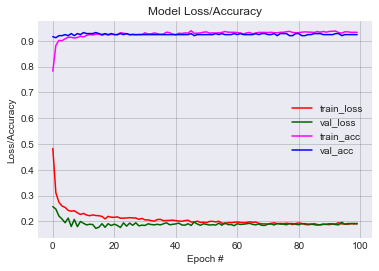

In [48]:
# original results
plt.style.use('seaborn-darkgrid')
plt.figure()
plt.plot(history.history['loss'], color = 'red')
plt.plot(history.history['val_loss'], color = 'darkgreen')
plt.plot(history.history['accuracy'], color = 'magenta')
plt.plot(history.history['val_accuracy'], color = 'blue')
plt.title('Model Loss/Accuracy')
plt.ylabel('Loss/Accuracy')
plt.xlabel('Epoch #')
plt.legend(['train_loss', 'val_loss', 'train_acc', 'val_acc'], loc = 'center right')
plt.grid(axis = 'y', c = 'black', alpha = 0.2)
plt.grid(axis = 'x', c = 'black', alpha = 0.2)
#plt.savefig(r'graphs\vgg19gap_acc_loss.png', dpi = 100)

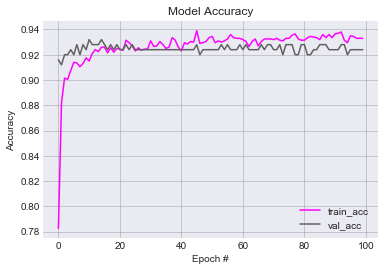

In [23]:
# original results
plt.style.use('seaborn-darkgrid')
plt.figure()
plt.plot(history.history['accuracy'], color = 'magenta')
plt.plot(history.history['val_accuracy'], color = '#606060')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch #')
plt.legend(['train_acc', 'val_acc'], loc = 'lower right')
plt.grid(axis = 'y', c = 'black', alpha = 0.2)
plt.grid(axis = 'x', c = 'black', alpha = 0.2)
#plt.savefig(r'graphs\vgg19gap_acc.png', dpi = 100)

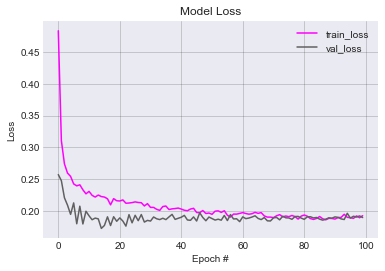

In [24]:
# original results
plt.style.use('seaborn-darkgrid')
plt.figure()
plt.plot(history.history['loss'], color = 'magenta')
plt.plot(history.history['val_loss'], color = '#606060')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch #')
plt.legend(['train_loss', 'val_loss'], loc = 'upper right')
plt.grid(axis = 'y', c = 'black', alpha = 0.2)
plt.grid(axis = 'x', c = 'black', alpha = 0.2)
#plt.savefig(r'graphs\vgg19gap_loss.png', dpi = 100)

In [49]:
# model.save(r'model\vgg19gap.h5')   